# **Pytorch Basics**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Tensors

A **tensor** is a multi-dimensional matrix containing only a single data type. They are mathematical objects, like scalars and vectors. A scalar is a zero rank tensor and a vector is a first rank tensor.

<font color="red">torch.tensor()</font> is used to generate tensors with known entries.

In [2]:
a = torch.tensor([1.0, -0.5])
b = torch.tensor([[1.5, -2.0],[0.75, 0.25]])

print(f'a = {a}')
print(f'a = {b}')

a = tensor([ 1.0000, -0.5000])
a = tensor([[ 1.5000, -2.0000],
        [ 0.7500,  0.2500]])


<font color="red">torch.rand()</font> is used to generate tensors with random entries between (0, 1)

In [3]:
# shape 2x2x3
c = torch.rand(2,2,3) 
print(c)

# shape 2x3x4x5
d = torch.rand(1,2,3,4)
print(d)

tensor([[[0.9181, 0.4621, 0.1108],
         [0.9177, 0.0716, 0.4529]],

        [[0.5485, 0.7078, 0.7862],
         [0.8518, 0.6121, 0.7012]]])
tensor([[[[0.7254, 0.8942, 0.7427, 0.1929],
          [0.5621, 0.3024, 0.1274, 0.1686],
          [0.3879, 0.7595, 0.7034, 0.7705]],

         [[0.6299, 0.6795, 0.4128, 0.5541],
          [0.0796, 0.8635, 0.1060, 0.2374],
          [0.5594, 0.8125, 0.5738, 0.2340]]]])


<font color="red">torch.ones()</font> is used to generate a tensor of 1's. We can use it to generate constant valued tensors.

In [4]:
e = torch.ones(2,2)
print(e)

f = torch.ones(2,2,2)*1.5
print(f)

tensor([[1., 1.],
        [1., 1.]])
tensor([[[1.5000, 1.5000],
         [1.5000, 1.5000]],

        [[1.5000, 1.5000],
         [1.5000, 1.5000]]])


We can slice tensors in a similar way to numpy.

In [5]:
# Shape 3x3
# Random values 0-1
g = torch.rand(3,3)
print(g)

first_row = g[0,:]
second_row = g[1,:]
third_row = g[2,:]

print(f'1st row: {first_row}')
print(f'2nd row: {second_row}')
print(f'3rd row: {third_row}')


tensor([[0.5824, 0.5646, 0.5867],
        [0.5029, 0.7244, 0.8740],
        [0.2775, 0.3927, 0.7362]])
1st row: tensor([0.5824, 0.5646, 0.5867])
2nd row: tensor([0.5029, 0.7244, 0.8740])
3rd row: tensor([0.2775, 0.3927, 0.7362])


<font color="red">tensor.shape</font> is used to check the sizes of a tensor

In [6]:
h = torch.rand(3,4)
# Size of tensor
print(h.shape)
# Size of 1st row
print(h[0,:].shape)

torch.Size([3, 4])
torch.Size([4])


<font color="red">tensor.dtype</font> is used to check the data type of elements in the tensor. The default is **float32** (single precision).

In [7]:
i = torch.rand(3,4)
print(i.dtype)

j = torch.tensor([0,1], dtype=torch.float64)
print(j.dtype)

torch.float32
torch.float64


<font color="red">tensor.view</font> is used to reshape tensors

In [8]:
k = torch.zeros(2,2)
l = k.view(4,1)
print(k)
print(l)

# -1 mmeans PyTorch will infer this dimension
m = l.view(-1, 2)
print(m)

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.],
        [0.],
        [0.],
        [0.]])
tensor([[0., 0.],
        [0., 0.]])


### Tensor Linear Algebra

In [9]:
a = torch.rand(2,2)
b = torch.rand(2,2)

# adding tensors
c = a + b
d = torch.add(a,b)
print(c)
print(d)


tensor([[0.9297, 1.6356],
        [0.8795, 0.1861]])
tensor([[0.9297, 1.6356],
        [0.8795, 0.1861]])


You can use all the operators with tensors (-, +, *, /)

In [10]:
c = torch.ones(2,2)
d = torch.ones(2,2) + 1

# Matrix multiplication
print(c*d)
print(c @ d)

# Element wise operations
print(c/d) 
print(c-d)
print(c+d)

tensor([[2., 2.],
        [2., 2.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[3., 3.],
        [3., 3.]])


### Converting torch.tensor to numpy array and vice versa

We will be using matplotlib for visualisation which only accepts numpy arrays so it is important to be able to convert a torch.tensor into a numpy array.

In [11]:
a = torch.ones(2,2)
b = a.numpy()
print(b, type(b))

[[1. 1.]
 [1. 1.]] <class 'numpy.ndarray'>


We should also be able to from a numpy array to a torch.tensor.

In [12]:
c = torch.tensor(c)
print(c, type(c))

tensor([[1., 1.],
        [1., 1.]]) <class 'torch.Tensor'>


C:\Users\hirus\AppData\Local\Temp\ipykernel_41512\1696347049.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c = torch.tensor(c)


## Autograd

### Finding function derivatives

Autograd is a package that uses automatic differentiation for all operations on Tensors. Generally speaking, <font color="red">torch.autograd</font> is an engine for computing the vector-Jacobian product. It computes partial derivatives while applying the chain rule.

Let's consider the function
$$
y = 2x + 1 \quad \text{for} \ x \in [0,1]
$$

Then,

$$
\frac{dy}{dx} = 2
$$

torch.Size([10])


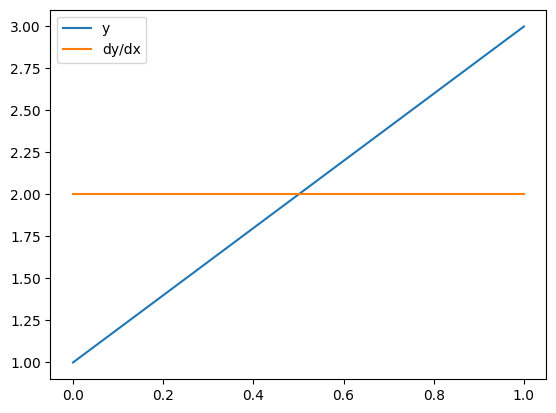

In [13]:
# requires_grad tracks operations on the tensor, so gradients can be computed for it later
# Pytorch will track computations involving x for gradient computation in later steps
x = torch.linspace(0,1,10,requires_grad=True)
y = 2*x + 1

# torch.autograd computes the gradient of y w.r.t x
# grad_outputs is needed because y is a tensor. Pytorch needs to know what to do with the gradient computations of each element

dydx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y),create_graph=True)[0]  

print(y.shape)
plt.plot(x.detach().numpy(),y.detach().numpy(), label = 'y')
plt.plot(x.detach().numpy(),dydx.detach().numpy(), label='dy/dx')
plt.legend()
plt.show()


Now, let's consider the function
$$
z = y^2
$$

and 
$$
\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx} = 2y \cdot 2 = 8x + 4
$$

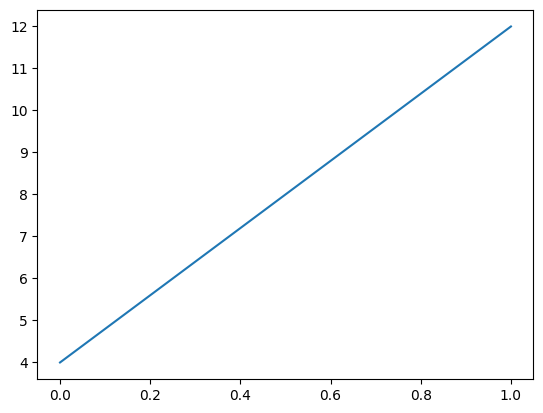

In [14]:
x = torch.linspace(0,1,10,requires_grad=True)
y = 2*x + 1
z = y**2 
dzdx = torch.autograd.grad(z, x, grad_outputs=torch.ones_like(y), create_graph = True)[0]
plt.plot(x.detach().numpy(),dzdx.detach().numpy())
plt.show()

### Backpropogation

In [15]:
x = torch.tensor([0, 0.5, 1], requires_grad=True)
y = x + 2
z = torch.sum(y)
print(z)

# none because we haven't computed gradients yet
print(x.grad)

# Now, we populate gradients
# Note, .backward() only works directly on scalars
# Computes gradients of z w.r.t x (dz/dx)
# z = sum(x + 2)
# dx/dx = [1, 1, 1]
z.backward()
print(x.grad)

tensor(7.5000, grad_fn=<SumBackward0>)
None
tensor([1., 1., 1.])




\begin{align}
    x &= \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}, \quad x_1 = 0, \quad x_2 = 0.5, \quad x_3 = 1
\end{align}

\begin{align}
    y &= x + 2 = \begin{bmatrix} x_1 + 2 \\ x_2 + 2 \\ x_3 + 2 \end{bmatrix}
\end{align}

\begin{align}
    z &= \sum y = (x_1 + 2) + (x_2 + 2) + (x_3 + 2)
\end{align}

Simplifying,

\begin{align}
    z &= x_1 + x_2 + x_3 + 6
\end{align}


\begin{align}
    \frac{dz}{dx_1} &= \frac{d}{dx_1} (x_1 + x_2 + x_3 + 6) = 1 \\
    \frac{dz}{dx_2} &= \frac{d}{dx_2} (x_1 + x_2 + x_3 + 6) = 1 \\
    \frac{dz}{dx_3} &= \frac{d}{dx_3} (x_1 + x_2 + x_3 + 6) = 1
\end{align}

Thus, the gradient is:

\begin{align}
    \frac{dz}{dx} &= \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
\end{align}


#### *Important Note!*

In Pytorch, calling **.backward()** computes gradients and accumulates them into the **.grad** attribute of tensors with **requires_grad=True**. Therefore, if you call .backward() multiple times without resetting the gradients, Pytorch adds the new gradients to the existing ones instead of overwriting them. This accumulation behaviour is why we need to clear gradients before optimisation in deep learning. 

During optimisation, we use **optmimiser.zero_grad()** to reset the gradients!

Here are some other ways of stopping a tensor from tracking history:

In [16]:
a = torch.randn(2,2)
b = (a * a).sum()

print(a)
print(b)

print(a.requires_grad)
print(b.requires_grad)

tensor([[-0.7952,  0.7492],
        [-0.7473,  1.0641]])
tensor(2.8843)
False
False


In [17]:
a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.requires_grad)

True
True


In [18]:
# detaching will also prevent gradient computation 
a = torch.rand(2,2, requires_grad=True)
b = (a * a).sum()
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [19]:
a = torch.rand(2,2, requires_grad=True)
b = (a * a).sum() 
print(a.requires_grad)

# any code inside this block won't track gradients
with torch.no_grad():
    b = (a * a).sum() 
    print(b.requires_grad)

True
False


### Gradient Descent Method

Here is an example of linear regression with a mean squared loss function, and optimisation done using gradient descent.

$$
f(x) = w x + b
$$

  $$\hat{f}(x) = 2*x$$

$$loss(f,\hat{f}) = \frac{1}{N_x} \sum_{k=0}^{N_x}(f(x_k) - \hat{f}(x_k))^2 $$

- $f(x)$ is the true function that we want to learn
- $\hat{f}(x)$ is the predicted function 

The gradient descent method will try to find the weights $w$ and bias $b$ that minimises the loss function.

In [20]:
def forward(x):
    return w * x

def loss_func(y, y_pred):
    return ((y_pred - y)**2).mean()

In [21]:
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) 

X_test = 5.0

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [22]:
learning_rate = 0.01  
n_epochs = 100

for epoch in range(n_epochs):
    y_pred = forward(X)
    l = loss_func(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    # w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad
    
    # zero the gradients after updating
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


## Model, Loss and Optimiser

A typical PyTorch pipeline looks like this:
1) Design model
2) Specify train and test data
3) Construct loss and optimiser
4) Training loop:
    - Forward -> compute prediction and loss
    - Backward -> compute gradients
    - Update weights

In [23]:
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# Step 1
# Design model

## nn.Linear creates a fully connected NN
# it applies a linear transformation
# y = wx + b

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        # super() is used to call a method from the parent class
        # it calls the the __init__ method from nn.Module
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


# Step 2
# Specify train and test data

X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

X_test = torch.tensor([5], dtype=torch.float32)

input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

n_samples = 8, n_features = 1
Prediction before training: f(5.0) = -3.771


In [24]:
# Step 3
# Define loss and optimiser

learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()

# Selct the optimiser with torch.optim
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# This tunes the learning rate during training
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

In [25]:
# Training loop
for epoch in range(n_epochs):
    y_predicted = model(X)
    l = loss(Y, y_predicted)

    # compute gradients, backpropogation
    l.backward()

    # update weights
    optimizer.step()

    # reset the gradients after updating
    optimizer.zero_grad()

    # update learning rate
    scheduler.step()
    
    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')


epoch  10 : w =  2.0274243354797363  loss =  0.00577659672126174
epoch  20 : w =  2.027808666229248  loss =  0.005074793007224798
epoch  30 : w =  2.026719093322754  loss =  0.004684572573751211
epoch  40 : w =  2.0266122817993164  loss =  0.004613950382918119
epoch  50 : w =  2.0265069007873535  loss =  0.004577253013849258
epoch  60 : w =  2.026401996612549  loss =  0.0045408704318106174
epoch  70 : w =  2.0263924598693848  loss =  0.00453399121761322
epoch  80 : w =  2.0263829231262207  loss =  0.0045303888618946075
epoch  90 : w =  2.0263733863830566  loss =  0.004526784643530846
epoch  100 : w =  2.0263733863830566  loss =  0.004526122938841581
Prediction after training: f(5.0) = 9.984


## First Neural Net

In [27]:
import torch.nn.functional as F

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(16, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return X
    
model = MyNetwork()
print(model)

MyNetwork(
  (fc1): Linear(in_features=16, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
# We can do this in a more compact way

model_2 = nn.Sequential(
    nn.Linear(16,12),
    nn.ReLU(),
    nn.Linear(12, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

print(model_2)

Sequential(
  (0): Linear(in_features=16, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)
Linear(in_features=16, out_features=12, bias=True) Parameter containing:
tensor([[-0.0979, -0.1749,  0.2135,  0.1827,  0.1488, -0.0007, -0.1624,  0.0860,
         -0.1198,  0.2411, -0.1919,  0.0481, -0.0883, -0.1604, -0.1675, -0.1483],
        [-0.2372, -0.1844, -0.1706,  0.2158,  0.1594,  0.0099, -0.2196, -0.1264,
         -0.1092,  0.1876, -0.2033,  0.0399,  0.1679, -0.0414,  0.0971, -0.0972],
        [-0.2493, -0.1431,  0.1238, -0.2448,  0.2417,  0.0737,  0.0784,  0.2023,
         -0.2364, -0.0337, -0.0959, -0.1346, -0.2067,  0.1875,  0.0446, -0.0694],
        [-0.1678, -0.0988,  0.0844, -0.1212, -0.0780, -0.1374,  0.0121, -0.0131,
         -0.0399,  0.0023,  0.1996, -0.2463, -0.1274, -0.0208, -0.0733, -0.2047],
        [ 0.0416, -0.0516, -0.1082, -0.1303

In [36]:
print(model_2[0], model_2[0].weight)

Linear(in_features=16, out_features=12, bias=True) Parameter containing:
tensor([[-0.0979, -0.1749,  0.2135,  0.1827,  0.1488, -0.0007, -0.1624,  0.0860,
         -0.1198,  0.2411, -0.1919,  0.0481, -0.0883, -0.1604, -0.1675, -0.1483],
        [-0.2372, -0.1844, -0.1706,  0.2158,  0.1594,  0.0099, -0.2196, -0.1264,
         -0.1092,  0.1876, -0.2033,  0.0399,  0.1679, -0.0414,  0.0971, -0.0972],
        [-0.2493, -0.1431,  0.1238, -0.2448,  0.2417,  0.0737,  0.0784,  0.2023,
         -0.2364, -0.0337, -0.0959, -0.1346, -0.2067,  0.1875,  0.0446, -0.0694],
        [-0.1678, -0.0988,  0.0844, -0.1212, -0.0780, -0.1374,  0.0121, -0.0131,
         -0.0399,  0.0023,  0.1996, -0.2463, -0.1274, -0.0208, -0.0733, -0.2047],
        [ 0.0416, -0.0516, -0.1082, -0.1303,  0.0585,  0.0278,  0.2442,  0.1656,
          0.1165,  0.0757, -0.1023, -0.1436,  0.2347, -0.0651,  0.2160,  0.1440],
        [-0.1563,  0.0965, -0.0878, -0.1155,  0.1911, -0.2218, -0.0209,  0.1780,
          0.0465,  0.0821, -0.1

In [ ]:
# We can mix both of these approaches

class MyNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define the layers
        self.layers = nn.Sequential(
            nn.Linear(16, 12),
            nn.ReLU(),
            nn.Linear(12, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )
    
    def forward(self, x):
        # forward pass
        x = torch.sigmoid(self.layers(x))
        return x

# instantiate the model
model = MyNetwork2()

# print model architecture
print(model)

MyNetwork2(
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
  )
)
